In [1]:
import os
import re
import numpy as np
import operator

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
## Lemmatizations
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Lakshmi
[nltk_data]     Praffulla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
inside_folder = '20_newsgroups'

In [4]:
directory_r = [f for f in os.listdir('./20_newsgroups') if not f.startswith('.')]
directory_r

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
wanted_directory =['comp.graphics','sci.med','talk.politics.misc','rec.sport.hockey','sci.space']


In [6]:
def lematization(data):
    lemmatizer = WordNetLemmatizer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for i in tokens:
        new_text = new_text + " " + lemmatizer.lemmatize(i)
    
    return new_text

In [7]:
def convert_lower_case(data):
    return np.char.lower(data)

In [8]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [9]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [10]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [11]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [12]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [13]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) 
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    
    data = lematization(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

In [56]:
processed_text = []
doc_list = []
paths = []

path_number = []

co = 0
for i in range(len(wanted_directory)):
    files = os.listdir('./20_newsgroups/' + wanted_directory[i])
    for j in range(len(files)):
        path = './20_newsgroups/' + wanted_directory[i] + '/' + files[j]
        
        doc_id = files[j]
        
        path_number.append(files[j])
        paths.append(wanted_directory[i] + '/' + files[j])
        
        text = open(path,'r',errors='ignore').read()
        doc_list.append(text)
        
        processed_text.append(word_tokenize(str(preprocess(text))))
        
        
        if co%1000 == 0:
            print(co)
        co = co + 1

0
1000
2000
3000
4000


In [15]:
len(processed_text)

5000

# Cosine Similarity with tf-idf weighting

In [63]:
path_num_int = []
for item in path_number:
    path_num_int.append(int(item))

In [16]:
# processed_text has all the text_data of each document stored in a list
# processed_text = [[Doc_0 text],[Doc_1 text],.....]

#Natural Term Frequency = tf

natural_term_frequency = []
for item in processed_text:
    dictionary_tf ={}
    
    for word in item:
        if dictionary_tf.get(word) == None:
            dictionary_tf[word] = 1
        else:
            count = dictionary_tf.get(word)
            count += 1
            dictionary_tf[word] = count
    
    natural_term_frequency.append(dictionary_tf)

In [17]:
# Logarithmic Term Frequency = 1 + log(tf)

logarithmic_term_frequency = []

for item in natural_term_frequency:
    dictionary_ltf = {}
    allkeys = item.keys()
    
    for word in allkeys:
        natural_freq = item.get(word)
        log_freq = 1 + np.log(natural_freq)
        dictionary_ltf[word] = log_freq
        
    logarithmic_term_frequency.append(dictionary_ltf)

In [18]:
# logarithmic_term_frequency

In [19]:
#Document Frequency 

document_frequency = {}

for item in processed_text:
    
    unique_terms = list(set(item))
    
    for word in unique_terms:
            
        
        if document_frequency.get(word) == None:
            document_frequency[word] = 1
        else:
            count = document_frequency.get(word)
            count += 1
            document_frequency[word] = count

In [20]:
len(document_frequency)

51376

In [21]:
print(len(document_frequency))
N = len(processed_text)
print('Total Number of documents are',N)

51376
Total Number of documents are 5000


In [22]:
#Inverse Document Frequency 

inverse_document_frequency = {}

keys_df = document_frequency.keys()

for item in keys_df:
    
    getvalue = document_frequency[item]
    in_doc_freq = np.log(N/getvalue)
    inverse_document_frequency[item] = in_doc_freq


In [23]:
#TF-IDF weighting 
#Natural_Term_Frequency



list_return = []

for item in natural_term_frequency:
    dict_inside = {}
    allkeys = item.keys()
    
    for word in allkeys:
        current_freq = item[word]
        idf_for_word = inverse_document_frequency[word]
        update_freq = current_freq * idf_for_word
        dict_inside[word] = update_freq
    
    list_return.append(dict_inside)



In [24]:
#Function block for calculating TF-IDF

def calculate_tfidf(list_tf):
    list_return = []
    
    for item in list_tf:
        dict_inside = {}
        allkeys = item.keys()
        
        for word in allkeys:
            current_freq = item[word]
            idf_for_word = inverse_document_frequency[word]
            update_freq = current_freq * idf_for_word
            dict_inside[word] = update_freq
    
        list_return.append(dict_inside)
    
    return list_return

In [25]:
len(natural_term_frequency)

5000

In [26]:
tfidf_n = calculate_tfidf(natural_term_frequency)

In [27]:
tfidf_log = calculate_tfidf(logarithmic_term_frequency)

In [28]:
#tfidf_log

In [29]:
## Till now we have tf-idf score in form of "tfidf_log"
## Document frequency is in "document_frequency"

    

In [32]:
#All terms that are present
all_terms = list(document_frequency.keys())

len(all_terms)

51376

In [1]:
# all_terms

In [35]:
doc_vector = []

for item in tfidf_log:
    #item is a dictionary. it is a document actually
    doc_inside = []
    for word in all_terms:
        #for each term
        
        if word in item :
            #check if the word is present in the document. if yes then store its frequency or else store 0.0
            temp = item[word]
            doc_inside.append(temp)
        else:
            doc_inside.append(0.0)
            
    doc_vector += [doc_inside]        


In [36]:
len(doc_vector[0])

51376

In [37]:
#Normalization of doc vectors
    
norm_doc_vector = []

co = 0

for item in doc_vector:
        #each doc list
    
    co = co + 1
    
    if(co%1000 == 0):
        print(co)
    
    norm = 0.0
    for freq in item:
        norm += (freq*freq)
    
    norm = 1 / np.sqrt(norm)
    
    temp_list = []
    
    for freq in item:
        k = freq * norm
        temp_list.append(k)
        
    norm_doc_vector.append(temp_list)

1000
2000
3000
4000
5000


In [38]:
len(norm_doc_vector)

5000

In [39]:
len(norm_doc_vector[0])

51376

In [37]:
# norm_doc_vector

In [308]:
# Question 1

# Implementing Cosine Similarity Measure with tf-idf weighting 

query_ = "Pretty good opinions on biochemistry machines"

#top k documents to retrive
k = 10
norm_query_vector = normalizeQueryVector(query)

top_,cosine = cosineScore(norm_query_vector,norm_doc_vector,k)


In [309]:
print("The Top ",k," documents retrived for the given query are : ")
print()  
print("      File Name","                       "," Cosine Score ")
for item in top_:
    print(paths[item],"               ",cosine[item])
    
    
    

The Top  10  documents retrived for the given query are : 

      File Name                          Cosine Score 
comp.graphics/38272                 0.029421723339996295
sci.med/59587                 0.029362520348898927
sci.space/62408                 0.02935727583110483
sci.space/61307                 0.028850823503450394
sci.space/61393                 0.0281714762802911
comp.graphics/38928                 0.02781047458883607
sci.med/59269                 0.027780694542676836
comp.graphics/38626                 0.02747538337246704
sci.med/58906                 0.027100090448058944
sci.space/62104                 0.026950998302709174


# Implementing Rocchio Algorithm

In [295]:
def segregatedocuments(out):
    
    for i in range(len(out)):
        print(i, paths[out[i]])

#     n_rel = input("Enter Non Relevant Docs: ").split(" ")
    
#     nr_docs = [out[int(i)] for i in n_rel]
#     r_docs = list(set(out)-set(nr_docs))
    
    
    n_rel = input("Enter Relevant Docs: ").split(" ")
    
    r_docs = [out[int(i)] for i in n_rel]
    nr_docs = list(set(out)-set(r_docs))
    
    for i in n_rel:
        
        rel_doc_int.append(int(i))
        
        
    return r_docs, nr_docs

In [296]:
def centroid(list_taken):
    
    k = [] 

    for item in list_taken:
        k.append(norm_doc_vector[item])
    
    return np.array(k).sum(axis=0)/len(list_taken)
#     list_taken = list(list_taken)
#     N = len(list_taken)
#     sum_list = [0.0] * len(norm_doc_vector[list_taken[0]])
    
#     for item in list_taken:
        
#         sum_list = np.add(sum_list,norm_doc_vector[item]) 
    
#     sum_list = [x / N for x in sum_list]
    
#     return np.array(sum_list)


In [297]:
def drawgraph(query_relevant,query_irrelevant,norm_query_vector):
    
    tsne = TSNE(n_components=2, random_state=0)
    
    doc_vector = []
    labels = []
    
    for item in query_relevant:
        doc_vector.append(norm_doc_vector[item])
        labels.append(0)
    
    for item in query_irrelevant:
        doc_vector.append(norm_doc_vector[item])
        labels.append(1)
        
    doc_vector.append(norm_query_vector)
    labels.append(2)    
    
    
    data_tofit = tsne.fit_transform(np.array(doc_vector))
    k = np.array(data_tofit)
    t = ("Relevant","Non Relevant","Query")
    plt.scatter(k[:, 0], k[:, 1], c=labels, s=60, alpha=0.8, label="Violet-R, Aqua-NR")
    plt.title("Rocchio Algorithm")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    

In [298]:
def normalizeQueryVector(query):
    
    query_text = word_tokenize(str(preprocess(query)))
    
    #term_freq_query
    term_freq_query = {}

    for item in query_text:
    
        if item in term_freq_query:
            temp = term_freq_query[item]
            temp += 1
            term_freq_query[item] = temp
        else:
             term_freq_query[item] = 1
    
    
    
    # Coverting into log frequency
    
    for item in term_freq_query.keys():
    
        temp = term_freq_query[item]
        new = 1 + np.log(temp)
        term_freq_query[item] = new
        
    #inverse_document_frequency
    tf_idf_query = {}
    
    for item in term_freq_query.keys():
    
        if item in inverse_document_frequency :
        
            temp = inverse_document_frequency[item]
            toadd = temp * term_freq_query[item]
        
            tf_idf_query[item] = toadd
        
        else:
            tf_idf_query[item] = 0.0
            
            
    #  query vector 
    
    query_vector = []
    
    for word in all_terms :
    
        if word in tf_idf_query :
            temp = tf_idf_query[word]
            query_vector.append(temp)
        else:
            query_vector.append(0.0)
            
            
    #Normalization of query vector    
    
    norm_query_vector = []

    normal = 0.0
    for item in query_vector:
        normal += (item*item)
    
    normal = 1/np.sqrt(normal)
    for item in query_vector:
        norm_query_vector.append(item * normal)
        
        
    
    return norm_query_vector
    

In [299]:
def cosineScore(norm_query_vector,norm_doc_vector,top_k_doc_to_show):
    
    cosine_scores = {}

    doc_id = -1
    for item in norm_doc_vector:
    
        doc_id += 1
        
        list_doc = np.array(item)
        list_query = np.array(norm_query_vector)
        score = sum(list(list_doc * list_query))
    
        cosine_scores[doc_id] = score
    
    sorted_cosine_scores = dict(sorted(cosine_scores.items(),key=operator.itemgetter(1),reverse=True))
    l = list(sorted_cosine_scores)
    
    ret = []
    
    for i in l:
        if i not in documents_visited:
            ret.append(i)
    
    
    return ret[:top_k_doc_to_show],sorted_cosine_scores   

    

In [300]:
def drawprcurve(rel_doc):
    
    
    recall = []
    precision = []
    
    relevance = len(rel_doc)
    
    count = 1
    for item in rel_doc:
        
        recall.append(count/relevance)
        precision.append(count/(item+1))
        
        count = count + 1
    
    print("PR Curve Ploting : ")
    
    plt.plot(recall,precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    
    
    sum_ = 0
    
    for item in precision:
        sum_ = sum_+ item
    
    
    ans_ = sum_/len(precision)
    map_cal.append(ans_)
    
    
    sum__ = 0 
    
    for item in map_cal:
        sum__ = sum__ + item
    
    ans = sum__/len(map_cal)
    
    print("MAP Calculation is : ",ans)

In [304]:
query_check = {}
documents_visited = []
rel_doc_int = []

map_cal = []

def runalgorithm(query,iterate,documents_visited,top_k_doc_to_show,relevant_doc_to_pick,relevant_doc_foulder):
    
    
    #query to vector form!!
    norm_query_vector = normalizeQueryVector(query)
    
    for i in range(iterate):
        
        print("\n Round ",i)
        print()
        
        
        if 'present' in query_check :
            
            getlist = query_check['present']
            query_relevant = getlist[0]
            query_irrelavant = getlist[1]
            query_vector_old = getlist[2]
            
            
            #Using alpha = 1, beta = 0.75 and gamma = 0.25
            
            query_vector_after = (1*query_vector_old) + (0.75*centroid(query_relevant)) - (0.25*centroid(query_irrelavant))
            
            
        else :
            query_vector_after = norm_query_vector
            query_relevant = set()
            query_irrelavant = set()
             
        gettopdocuments,allscore = cosineScore(query_vector_after,norm_doc_vector,top_k_doc_to_show)    
        
        
        print("Enter ",relevant_doc_to_pick," documents to pick from",relevant_doc_foulder,"file as they are relevant")
        print()    
        #[[rel doc][non rel doc]]
        
        seg_doc = segregatedocuments(gettopdocuments) 
        
        
        
        query_relevant = query_relevant | set(seg_doc[0])
        query_irrelavant = query_irrelavant | set(seg_doc[1])
        
        documents_visited += query_relevant
        documents_visited += query_irrelavant
        
#         print(query_relevant,query_irrelavant)
        
        q_r = set()
        queryrel_list = []
        for item in query_relevant:
            q_r.add(paths[item])
            queryrel_list.append(path_num_int[item])
            
        q_ir = set()
        querynonrel_list = []
        for item in query_irrelavant:
            q_ir.add(paths[item])
            querynonrel_list.append(path_num_int[item])
            
            
        
        print("The documents which are relevant till now :",q_r)
        print()
#         print("The documents which are not relevant till now :",q_ir)
        
        print()
        drawprcurve(rel_doc_int)
        
        rel_doc_int.clear()
        
        print()
        drawgraph(query_relevant,query_irrelavant,query_vector_after)
        
        query_check['present'] = [query_relevant,query_irrelavant,query_vector_after]
        
        

In [305]:
query = "Scientific tools for preserving rights and body"
relevant_doc_foulder = "talk.politics.misc"


 Round  0

Enter  10  documents to pick from talk.politics.misc file as they are relevant

0 sci.space/61335
1 sci.med/59434
2 sci.space/61385
3 sci.space/60229
4 sci.space/60248
5 sci.space/60809
6 sci.med/59137
7 comp.graphics/37920
8 sci.med/58053
9 comp.graphics/39655
10 sci.space/61079
11 sci.space/60797
12 sci.space/60820
13 sci.space/60819
14 sci.space/61009
15 talk.politics.misc/178540
16 comp.graphics/39736
17 sci.med/58569
18 sci.space/61456
19 sci.med/59548
20 sci.med/58775
21 comp.graphics/38409
22 comp.graphics/37919
23 sci.med/58052
24 talk.politics.misc/179106
25 sci.med/59291
26 sci.med/58900
27 sci.space/59871
28 sci.med/58997
29 sci.med/58108
30 sci.med/58898
31 sci.med/58941
32 talk.politics.misc/178546
33 comp.graphics/38484
34 sci.med/58719
35 comp.graphics/39057
36 sci.med/58139
37 sci.med/59371
38 sci.med/59069
39 sci.med/59273
40 sci.space/60872
41 comp.graphics/38609
42 comp.graphics/38375
43 comp.graphics/37261
44 comp.graphics/38852
45 sci.space/61145
46 sci

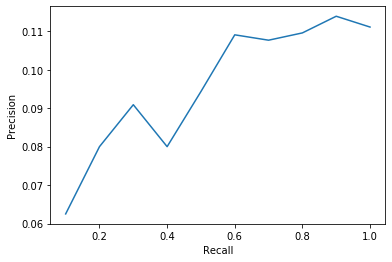

MAP Calculation is :  0.09591561331737301



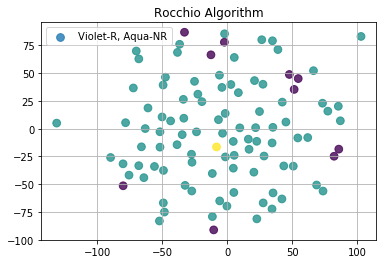


 Round  1

Enter  10  documents to pick from talk.politics.misc file as they are relevant

0 talk.politics.misc/178695
1 talk.politics.misc/178431
2 talk.politics.misc/178587
3 talk.politics.misc/178413
4 talk.politics.misc/178329
5 talk.politics.misc/178432
6 talk.politics.misc/178492
7 talk.politics.misc/176907
8 talk.politics.misc/178419
9 talk.politics.misc/178349
10 talk.politics.misc/178446
11 talk.politics.misc/178416
12 talk.politics.misc/178434
13 talk.politics.misc/178721
14 talk.politics.misc/179008
15 talk.politics.misc/179071
16 talk.politics.misc/178673
17 talk.politics.misc/178453
18 talk.politics.misc/178944
19 talk.politics.misc/176902
20 talk.politics.misc/178430
21 talk.politics.misc/176865
22 talk.politics.misc/179091
23 talk.politics.misc/178435
24 talk.politics.misc/178474
25 talk.politics.misc/176901
26 talk.politics.misc/178352
27 talk.politics.misc/178553
28 talk.politics.misc/178978
29 talk.politics.misc/178535
30 talk.politics.misc/178809
31 talk.politics.mi

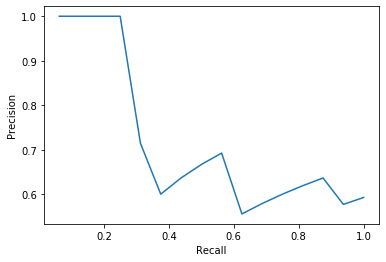

MAP Calculation is :  0.4063657303626628



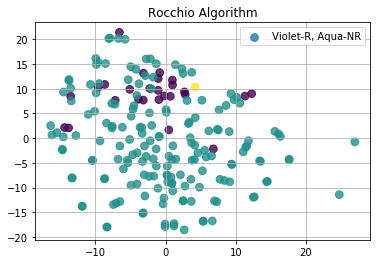


 Round  2

Enter  10  documents to pick from talk.politics.misc file as they are relevant

0 talk.politics.misc/178382
1 talk.politics.misc/178756
2 talk.politics.misc/176953
3 talk.politics.misc/178422
4 talk.politics.misc/178417
5 talk.politics.misc/179058
6 talk.politics.misc/178865
7 talk.politics.misc/176979
8 talk.politics.misc/178894
9 talk.politics.misc/176968
10 talk.politics.misc/178313
11 talk.politics.misc/179029
12 talk.politics.misc/176899
13 talk.politics.misc/179113
14 talk.politics.misc/178908
15 talk.politics.misc/176898
16 talk.politics.misc/178529
17 talk.politics.misc/176897
18 talk.politics.misc/179038
19 talk.politics.misc/176873
20 talk.politics.misc/179107
21 talk.politics.misc/178799
22 talk.politics.misc/179112
23 talk.politics.misc/178839
24 talk.politics.misc/179068
25 talk.politics.misc/178786
26 talk.politics.misc/179073
27 talk.politics.misc/178565
28 talk.politics.misc/176904
29 talk.politics.misc/178601
30 comp.graphics/38403
31 talk.politics.misc/178

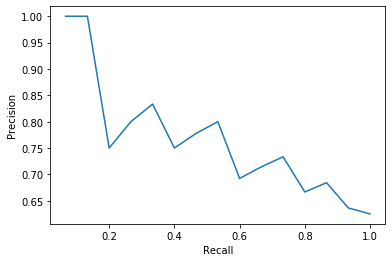

MAP Calculation is :  0.5256500131391961



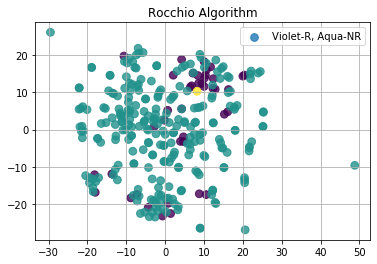

In [306]:
# We are also giving the relevant documenst

num_of_iteration = 3

#documents to retrive
top_k_doc_to_show = 100

#p% of total documents
relevant_doc_to_pick = 10 

runalgorithm(query,num_of_iteration,documents_visited,top_k_doc_to_show,relevant_doc_to_pick,relevant_doc_foulder)